# Enzyme Discovery
----
Welcome to the Jupyter Notebook on Enzyme Discovery! In this notebook, we will explore the discovery of enzymes and their related homologs on both a sequence and structural level. You will learn about the fundamental principles of enzyme function and the various tools and techniques used to identify and study these important biological molecules. From sequence analysis to structural visualization, we will delve into the world of enzymes and gain a deeper understanding of their role in cellular processes. So buckle up and get ready for a journey into the fascinating world of enzymes!

In this Jupyter Notebook, we'll use S-adenosylmethionine-dependent methyltransferases (Mtases) as an example to demonstrate a comprehensive enzyme discovery workflow. The research group I am a part of works with these enzymes, which play a crucial role in DNA methylation and the synthesis of flavor compounds, neurotransmitters, and antibiotics. This makes them an interesting example for our purpose. We will show how a synthetic biology approach can be used to improve Mtase activities and discover Mtase-specific drug candidates. Get ready to explore this exciting example and learn about enzyme discovery. Check out the study here: https://doi.org/10.1371/journal.pbio.2007050

The methyl-transferases we will take a look at are:

- ASMT (P46597) (Acetylserotonin O-methyltransferase) and
- PNMT (P10937) (Phenylethanolamine N-methyltransferase)

We will start by importing ProteusAI modules:

In [1]:
import sys
sys.path.append('../')
from mining import uniprot, alphafoldDB

## First glance
----
The first thing we can do to compare the sequences is to take a look at the sequences, which we can get from the uniprot mining tool:

In [2]:
ASMT = uniprot.get_protein_sequence('P46597')
PNMT = uniprot.get_protein_sequence('P10937')

print('>' + ASMT[0].description)
print(str(ASMT[0].seq), '\n')
print('>' + PNMT[0].description)
print(str(PNMT[0].seq))

>sp|P46597|ASMT_HUMAN Acetylserotonin O-methyltransferase OS=Homo sapiens OX=9606 GN=ASMT PE=1 SV=1
MGSSEDQAYRLLNDYANGFMVSQVLFAACELGVFDLLAEAPGPLDVAAVAAGVRASAHGTELLLDICVSLKLLKVETRGGKAFYRNTELSSDYLTTVSPTSQCSMLKYMGRTSYRCWGHLADAVREGRNQYLETFGVPAEELFTAIYRSEGERLQFMQALQEVWSVNGRSVLTAFDLSVFPLMCDLGGGAGALAKECMSLYPGCKITVFDIPEVVWTAKQHFSFQEEEQIDFQEGDFFKDPLPEADLYILARVLHDWADGKCSHLLERIYHTCKPGGGILVIESLLDEDRRGPLLTQLYSLNMLVQTEGQERTPTHYHMLLSSAGFRDFQFKKTGAIYDAILARK 

>sp|P10937|PNMT_RAT Phenylethanolamine N-methyltransferase OS=Rattus norvegicus OX=10116 GN=Pnmt PE=1 SV=3
MDRGSDPKHTAGMDSDSDPGQAEVALAYQRFEPRAYLRNNYAPPRGDLSNPDGVGPWKLRCMAQVFATGEVSGQVLIDIGSGPTIYQLLSACAHFEDITMTDFLEVNRQELGLWLREEPGAFDWSVYSQHVCLIEDKGESWQEKERQLRARVKRVLPIDVHKPQPLGASGLAPLPADALVSAFCLEAVSPDLPSFRQALYHITTLLRPGGNLLFIGALEESWYLAGEARLSVVPVSEEEVREALVCSGYEVRDLRTYIMPAHLRTGVDDVKGIFFAWAQKIEVQV


### Structure visualization

We see that the sequences are slightly different in length. To get a more clearer picture of the differences of these enzymes we can take a look at their structures. To get the (predicted) structures of the proteins we can simply download the pdb files from the AlphaFold database using the alphafoldDB mining tool:

The structures are displayed as cartoons using a coloring sheme to show the confidence of the prediction at every position. A high confidence indicated with blue color and a low confidence in red. 

In [3]:
from mining import alphafoldDB
ASMT_pdb = '../example_data/structures/ASMT.pdb'
PNMT_pdb = '../example_data/structures/PNMT.pdb'

alphafoldDB.get_pdb('P46597', ASMT_pdb)
alphafoldDB.get_pdb('P10937', PNMT_pdb)

True

In [4]:
from analysis import pdb

ASMT_view = pdb.show(pdb_str=ASMT_pdb, color='confidence')
ASMT_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
PNMT_view = pdb.show(pdb_str=PNMT_pdb, color='confidence')
PNMT_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Exploring Biological Diversity
----

In the field of protein engineering, researchers understand that the first enzyme they try may not be the best fit for the desired task. As a result, it's crucial to first explore the biological diversity before making any modifications. The aim is to uncover enzymes from various evolutionary origins. Instead of reinventing the wheel, it's wise to see what nature has already created.

We will look for related sequences using BLAST search which using the blast mining tool:

The blast search might take a while. You can load the data from example data if you don't want to wait.

In [6]:
from mining import blast
from io_tools import fasta

# this might take a while. You can skip this and load the fastas
#ASMT_hits, ASMT_hit_seqs = blast.search_related_sequences(query=ASMT[0].seq, database='swissprot')
#PNMT_hits, PNMT_hit_seqs = blast.search_related_sequences(query=PNMT[0].seq, database='swissprot')

# loading sequences and names from example data
ASMT_hits, ASMT_hit_seqs = fasta.load('../example_data/mining/ASMT/')  
PNMT_hits, PNMT_hit_seqs = fasta.load('../example_data/mining/PNMT/') 

## Multiple sequence alignements (MSA)
---
Next we can visualize the evolutionary similarity of the proteins using a multiple sequence alignements (MSA). The sequence alignement is enabled by the MUSCLE app which has to be installed seperately (not through python). Find instructions [here](https://2018-03-06-ibioic.readthedocs.io/en/latest/install_muscle.html). The MSA then visualized with the open-source package [biotite](https://www.biotite-python.org/index.html). Both the MSA and the visualization can be simultaneously performed using the MSA analysis tool:

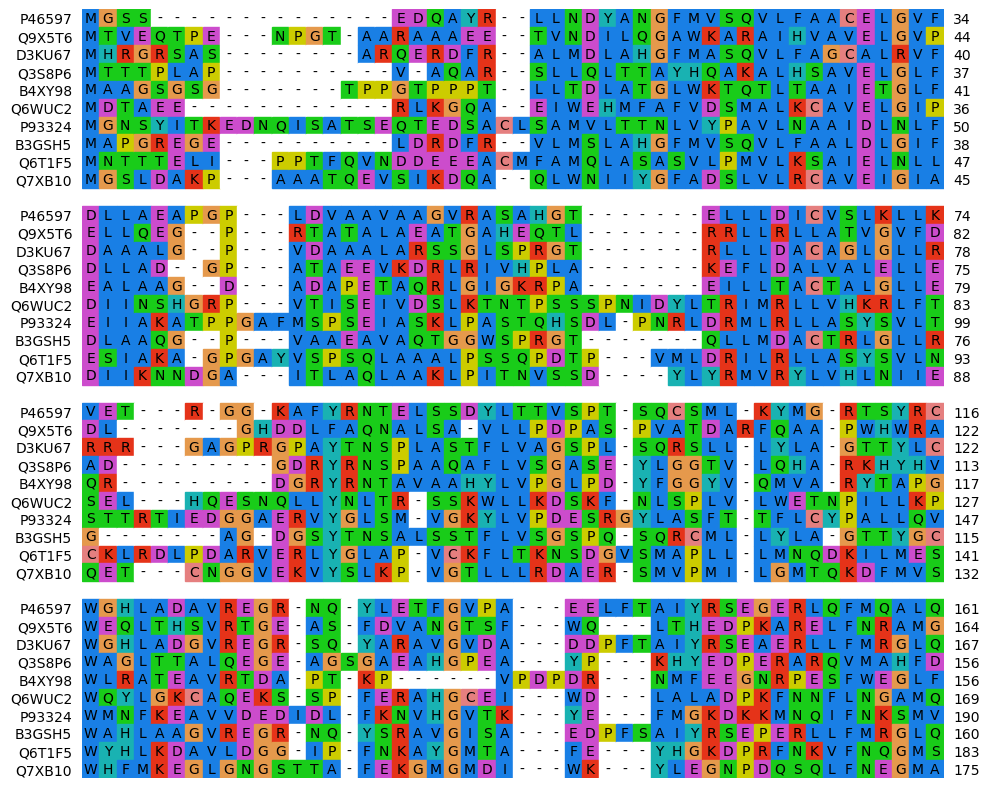

In [7]:
from analysis import MSA
    
ASMT_MSA_results = MSA.align_proteins(ASMT_hits[20:30], ASMT_hit_seqs[20:30], plot_results=True, plt_range=(0, 200))

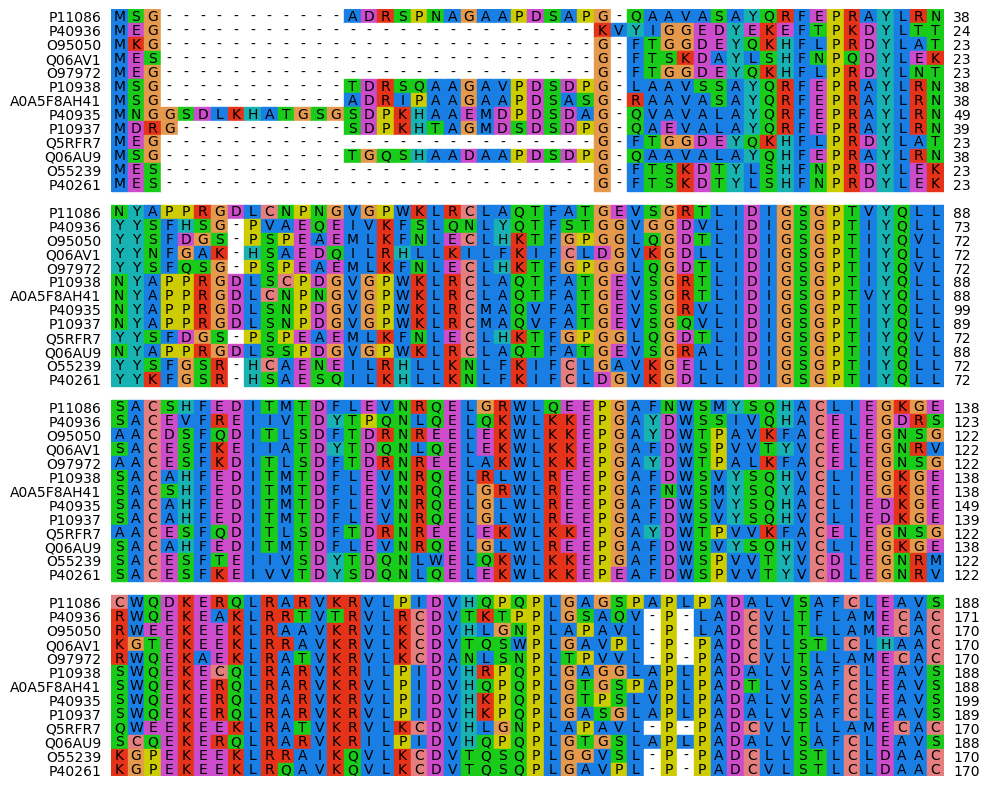

In [8]:
PNMT_MSA_results = MSA.align_proteins(PNMT_hits, PNMT_hit_seqs, plot_results=True, plt_range=(0, 200))

The MSA results are to large to practically view the entire seqeuence without looking to cluttered. Therefore, only a part of the first 200 positions of the alignement are displayed in the sequence. Also in the case of ASMT we are only looking at a subset of 10 sequences, since we got to many hits in the BLAST search to reasonably display them here. For more details about the methods read the documentation of the MSA module.

## Large Language Models (LLMs) for sequence representation
---

We can also compare the sequences by comparing the computed representations of large language models (LLMs) given the sequence. The representations can then be visualized in a 2D plot using principal compenent analysis (PCA). Computing the representations might take a while depending on your machine. Here we load data which has been calculated beforehand.

In [9]:
import torch
from extraction import embedd

# computing the representations
#device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
#batch_size = 10

#PNMT_data = list(zip(PNMT_hits, PNMT_hit_seqs))
#PNMT_representations = []
#for i in range(0, len(PNMT_data), batch_size):
    #_ = embedd.compute_representations(PNMT_data[i:i + batch_size], dest='../example_data/representations/PNMT' ,device=str(device))
    #PNMT_representations.append(r)
    
#ASMT_data = list(zip(ASMT_hits, ASMT_hit_seqs))
#ASMT_representations = []
#for i in range(0, len(ASMT_data), batch_size):
    #r = embedd.compute_representations(ASMT_data[i:i + batch_size], dest='../example_data/representations/PNMT', device=str(device))
    #ASMT_representations.append(r)

In [10]:
from io_tools import representations

PNMT_labels, PNMT_reps = representations.load('../example_data/representations/PNMT')
ASMT_labels, ASMT_reps = representations.load('../example_data/representations/ASMT')


In [11]:
import numpy as np

PNMT_Xs = torch.stack(PNMT_reps, dim=0).numpy()
ASMT_Xs = torch.stack(ASMT_reps, dim=0).numpy()

Xs = torch.stack(PNMT_reps + ASMT_reps, dim=0).numpy()
labels = [0 for _ in PNMT_labels] + [1 for _ in ASMT_labels]

In [12]:
from sklearn.decomposition import PCA

num_pca_components = 57
pca = PCA(num_pca_components)
Xs_pca = pca.fit_transform(Xs)

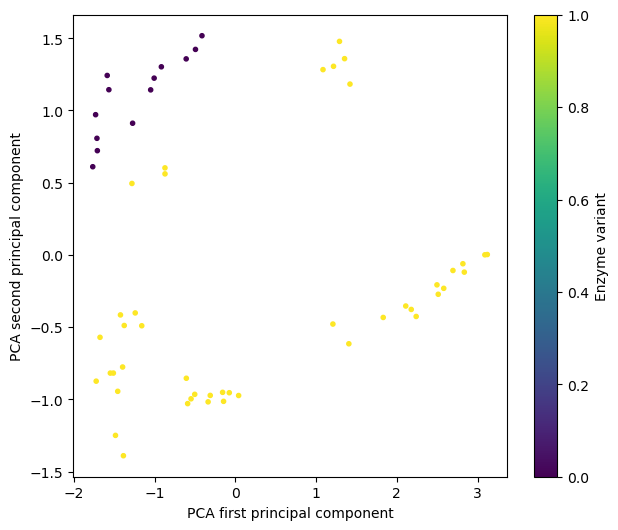

In [13]:
import matplotlib.pyplot as plt

fig_dims = (7, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sc = ax.scatter(Xs_pca[:,0], Xs_pca[:,1], c=labels, marker='.')
ax.set_xlabel('PCA first principal component')
ax.set_ylabel('PCA second principal component')
plt.colorbar(sc, label='Enzyme variant')

If we look at the plot, we can see different clusters of enzymes and we can see that the O-methyl transferases and N-methyl transferases do not overlap. If we only had a limited number of enzymes we could choose as starting candidates, we could for example pick representative sequences of the clusters and instead of just randomly selecting sequences. In subsequent rounds you could then look for sequences which are similar to well performing enzymes in more focused searches of that sequence.

## Visualization with TSNE
---
T-distributed Stochastic Neighbor Embedding (T-SNE) is a tool for visualizing high-dimensional data. T-SNE, based on stochastic neighbor embedding, is a nonlinear dimensionality reduction technique to visualize data in a two or three dimensional space. This visualization tool is more useful for visualizing representation spaces.

In [14]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(Xs) 

df = pd.DataFrame(
    {'Xs':PNMT_reps + ASMT_reps,
     'Ys':labels
    }
)

df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 56 nearest neighbors...
[t-SNE] Indexed 57 samples in 0.000s...
[t-SNE] Computed neighbors for 57 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 57 / 57
[t-SNE] Mean sigma: 1.814981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.282097
[t-SNE] KL divergence after 750 iterations: 0.028437


[Text(0.5, 1.0, 'Enzyme variant T-SNE projection')]

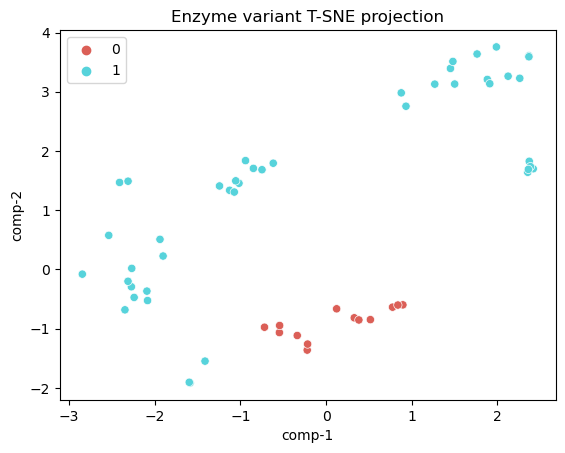

In [15]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.Ys.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Enzyme variant T-SNE projection") 